# Lab Sharks

Primero importamos librerias y los datos.

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
sharks = pd.read_csv('attacks.csv', encoding='latin1')
df = sharks.copy()
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [6]:
df.describe(include='object').T #ESTO ES LO CATEGORICO

,count,unique,top,freq
Case Number,8702,6287,0,2400
Date,6302,5433,1957,11
Type,6298,8,Unprovoked,4595
Country,6252,212,USA,2229
Area,5847,825,Florida,1037
Location,5762,4108,"New Smyrna Beach, Volusia County",163
Activity,5758,1532,Surfing,971
Name,6092,5230,male,550
Sex,5737,6,M,5094
Age,3471,157,17,154


In [7]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
df.columns = [c.lower().replace('_', ' ') for c in df.columns] #con esto ponemos todo en minusculas y reemplazamos las _ por espacio, son buenas practicas

In [9]:
df.columns = df.columns.str.strip() # Ahora eliminamos espacios en blanco al principio y al final de los nombres de las columnas

In [10]:
df.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time',
       'species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')

In [11]:
df.count()   # vemos los valores NO nulos

case number               8702
date                      6302
year                      6300
type                      6298
country                   6252
area                      5847
location                  5762
activity                  5758
name                      6092
sex                       5737
age                       3471
injury                    6274
fatal (y/n)               5763
time                      2948
species                   3464
investigator or source    6285
pdf                       6302
href formula              6301
href                      6302
case number.1             6302
case number.2             6302
original order            6309
unnamed: 22                  1
unnamed: 23                  2
dtype: int64

In [12]:
df.iloc[0] #primera fila, iloc funciona por indice, es decir , por posicion

case number                                                      2018.06.25
date                                                            25-Jun-2018
year                                                                 2018.0
type                                                                Boating
country                                                                 USA
area                                                             California
location                                        Oceanside, San Diego County
activity                                                           Paddling
name                                                            Julie Wolfe
sex                                                                       F
age                                                                      57
injury                    No injury to occupant, outrigger canoe and pad...
fatal (y/n)                                                               N
time        

In [13]:
columnas_a_eliminar = ['unnamed: 22', 'unnamed: 23']
df.drop(columns=columnas_a_eliminar, inplace=True)
#Por ahora no elimino nada, sobreesribo el data frame 

In [14]:
#df.set_index('country').head()  # establecer indice 

"""El método set_index en pandas se utiliza para establecer una o más columnas como el índice del DataFrame. 
El índice es una etiqueta que se utiliza para identificar y acceder a las filas en un DataFrame. 
Puedes usar set_index para cambiar el índice actual por una o más columnas de datos en tu DataFrame. 
keys: Puedes proporcionar una sola columna o una lista de columnas que deseas usar como índice. 
Si proporcionas una lista, se utilizarán múltiples columnas como índice jerárquico (índice múltiple).

inplace: Es un parámetro opcional que, si se establece en True, modificará el DataFrame original. Si se establece en False o no se proporciona, se creará un nuevo DataFrame con el índice modificado y se mantendrá el DataFrame original sin cambios.
"""

'El método set_index en pandas se utiliza para establecer una o más columnas como el índice del DataFrame. \nEl índice es una etiqueta que se utiliza para identificar y acceder a las filas en un DataFrame. \nPuedes usar set_index para cambiar el índice actual por una o más columnas de datos en tu DataFrame. \nkeys: Puedes proporcionar una sola columna o una lista de columnas que deseas usar como índice. \nSi proporcionas una lista, se utilizarán múltiples columnas como índice jerárquico (índice múltiple).\n\ninplace: Es un parámetro opcional que, si se establece en True, modificará el DataFrame original. Si se establece en False o no se proporciona, se creará un nuevo DataFrame con el índice modificado y se mantendrá el DataFrame original sin cambios.\n'

In [15]:
#df.loc[0, "pdf"] #asi reescribo una palabra dentro de una tabla 

In [16]:
nan_cols = df.isna().sum() #Vamos a ver todos los elements nulos que tenemos 

nan_cols[nan_cols>0]

case number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal (y/n)               19960
time                      22775
species                   22259
investigator or source    19438
pdf                       19421
href formula              19422
href                      19421
case number.1             19421
case number.2             19421
original order            19414
dtype: int64

In [17]:
df.duplicated().sum()  #Duplicados del DataFrame

19411

In [18]:
df.duplicated().any()

True

In [19]:
df = df.drop_duplicates()

In [20]:
df.shape

(6312, 22)

In [21]:
filas_nulas = df[df.isna().all(axis=1)] # Seleccionar las filas donde todos los valores son nulos

# Seleccionar las filas donde al menos un valor es nulo
# filas_con_al_menos_un_nulo = df[df.isna().any(axis=1)]  IMPORTANTE 

In [22]:
df.dropna(how='all', inplace=True) #elimino las filas donde todos los valores son nulos 
df.shape

(6311, 22)

In [23]:
nan_cols = df.isna().sum() # suma de elemento nulos  

nan_cols

case number                  1
date                         9
year                        11
type                        13
country                     59
area                       464
location                   549
activity                   553
name                       219
sex                        574
age                       2840
injury                      37
fatal (y/n)                548
time                      3363
species                   2847
investigator or source      26
pdf                          9
href formula                10
href                         9
case number.1                9
case number.2                9
original order               2
dtype: int64

In [24]:
df[df['case number'].isna()] #buscamos el nulo

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0


In [25]:
df.loc[5488, "case number"] = '1905.09.06' # lo corregimos 
df.loc[5488]

case number                                                      1905.09.06
date                                                   Reported 06-Sep-1905
year                                                                 1905.0
type                                                               Provoked
country                                                                 USA
area                                                                Florida
location                                       Fort Pierce, St Lucie County
activity                                                            Fishing
name                                                            David Curry
sex                                                                       M
age                                                                     NaN
injury                    Lacerations to leg from hooked shark PROVOKED ...
fatal (y/n)                                                               N
time        

In [26]:
df['case number'] = df['case number'].apply(lambda x: None if x == 0 else x) #cambio los ceros por nulos, asi consigo filas de todo nulos 

In [27]:
df['case number'].dtype #al no funcionar lo anterior, comprobamos el tipo de dato, ya que debería ser del tipo numérico (int o float).

dtype('O')

In [28]:
df['case number'] = df['case number'].replace('0', None) #Resulta que es de tipo objeto, asi que hago lo siguiente 

In [29]:
df.dropna(how='all', inplace=True) #y ahora si, elimino las filas donde todos los valores son nulos 
df.shape

(6310, 22)

In [30]:
nan_cols = df.isna().sum() # suma de elemento nulos  

nan_cols

case number                  7
date                         8
year                        10
type                        12
country                     58
area                       463
location                   548
activity                   552
name                       218
sex                        573
age                       2839
injury                      36
fatal (y/n)                547
time                      3362
species                   2846
investigator or source      25
pdf                          8
href formula                 9
href                         8
case number.1                8
case number.2                8
original order               1
dtype: int64

In [31]:
df[df['date'].isna()] #buscamos el nulo

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
6302,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.drop(25722, inplace=True) #elimino el nulo en date

In [33]:
df.drop([6302, 6303, 6304, 6305, 6306, 6307, 6308], inplace=True)

In [34]:
nan_cols = df.isna().sum() # suma de elemento nulos  

nan_cols

case number                  0
date                         0
year                         2
type                         4
country                     50
area                       455
location                   540
activity                   544
name                       210
sex                        565
age                       2831
injury                      28
fatal (y/n)                539
time                      3354
species                   2838
investigator or source      17
pdf                          0
href formula                 1
href                         0
case number.1                0
case number.2                0
original order               0
dtype: int64

In [35]:
df[df['year'].isna()] #buscamos el nulo en year

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,...,NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


In [36]:
df.loc[187, "year"] = '2017' # lo corregimos 
df.loc[6079, "year"] = '1836' # lo corregimos 

In [37]:
nan_cols = df.isna().sum() # suma de elemento nulos  

nan_cols

case number                  0
date                         0
year                         0
type                         4
country                     50
area                       455
location                   540
activity                   544
name                       210
sex                        565
age                       2831
injury                      28
fatal (y/n)                539
time                      3354
species                   2838
investigator or source      17
pdf                          0
href formula                 1
href                         0
case number.1                0
case number.2                0
original order               0
dtype: int64

In [38]:
df[df['type'].isna()] #buscamos el nulo en type

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
85,2017.09.15.a,15-Sep-2017,2017.0,NaN,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,...,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0
382,2015.07.27,27-Jul-2015,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,...,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0
4867,1936.09.11.R,Reported 11-Sep-1936,1936.0,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,...,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0
5705,1890.03.03.R,Reported 03-Mar-1890,1890.0,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,...,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0


In [39]:
df.loc[85, "type"] = 'unknown' # lo corregimos 
df.loc[382, "type"] = 'unknown' # lo corregimos 
df.loc[4867, "type"] = 'unknown' # lo corregimos 
df.loc[5705, "type"] = 'unknown' # lo corregimos 

In [40]:
nan_cols = df.isna().sum() # suma de elemento nulos  

nan_cols

case number                  0
date                         0
year                         0
type                         0
country                     50
area                       455
location                   540
activity                   544
name                       210
sex                        565
age                       2831
injury                      28
fatal (y/n)                539
time                      3354
species                   2838
investigator or source      17
pdf                          0
href formula                 1
href                         0
case number.1                0
case number.2                0
original order               0
dtype: int64

In [41]:
df[df['country'].isna()] #buscamos el nulo en country

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
62,2017.11.13.R,Reported 13-Nov-2017,2017.0,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,...,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0
525,2014.08.00,Aug-2014,2014.0,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,...,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778.0
2956,1983.00.00.d,Ca. 1983,1983.0,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,...,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0
3378,1970.11.00,Nov-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,...,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0
3387,1970.08.02,02-Aug-1970,1970.0,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,...,NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0
3388,1970.07.05,5-Jul-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,male,M,...,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.07.05,1970.07.05,2915.0
3395,1970.04.00.b,Apr-1970,1970.0,Provoked,NaN,NaN,NaN,Freediving,Lionel Jarvis,M,...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b-NV-Jarvis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.04.00.b,1970.04.00.b,2908.0
3399,1970.02.05,5-Feb-1970,1970.0,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,...,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,2904.0
3425,1969.08.00,Aug-1969,1969.0,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,...,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602,1969.08.00-NV-Hughes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.08.00,1969.08.00,2878.0
3605,1965.10.21,21-Oct-1965,1965.0,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,...,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,2698.0


In [42]:
#Queremos corregir country, area y location pero vemos que si las 3 son nulas no es posible asignar ubicacion, asi que las borramos

df.dropna(subset=['country', 'area', 'location'], how='all')

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [43]:
nan_cols = df.isna().sum() # suma de elemento nulos  

nan_cols

case number                  0
date                         0
year                         0
type                         0
country                     50
area                       455
location                   540
activity                   544
name                       210
sex                        565
age                       2831
injury                      28
fatal (y/n)                539
time                      3354
species                   2838
investigator or source      17
pdf                          0
href formula                 1
href                         0
case number.1                0
case number.2                0
original order               0
dtype: int64

In [44]:
df[df['country'].isna()] 
#buscamos el nulo en country y me doy cuenta de que me han hecho la 13/14 jaja, hay valores que pone NaN en el data frame que son cadenas de texto y no nulos... lo dejo para mas adelante y me centro en los nulos

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
62,2017.11.13.R,Reported 13-Nov-2017,2017.0,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,...,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0
525,2014.08.00,Aug-2014,2014.0,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,...,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778.0
2956,1983.00.00.d,Ca. 1983,1983.0,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,...,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0
3378,1970.11.00,Nov-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,...,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0
3387,1970.08.02,02-Aug-1970,1970.0,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,...,NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0
3388,1970.07.05,5-Jul-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,male,M,...,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.07.05,1970.07.05,2915.0
3395,1970.04.00.b,Apr-1970,1970.0,Provoked,NaN,NaN,NaN,Freediving,Lionel Jarvis,M,...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b-NV-Jarvis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.04.00.b,1970.04.00.b,2908.0
3399,1970.02.05,5-Feb-1970,1970.0,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,...,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,2904.0
3425,1969.08.00,Aug-1969,1969.0,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,...,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602,1969.08.00-NV-Hughes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.08.00,1969.08.00,2878.0
3605,1965.10.21,21-Oct-1965,1965.0,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,...,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,2698.0


In [45]:
filas_con_nulos = df[df['country'].isna()].index.to_list() # con esto saco las filas de nulos de country
filas_con_nulos


[62,
 525,
 2956,
 3378,
 3387,
 3388,
 3395,
 3399,
 3425,
 3605,
 3661,
 4018,
 4231,
 4266,
 4498,
 4639,
 4700,
 4712,
 4726,
 4729,
 4911,
 5020,
 5060,
 5425,
 5586,
 5587,
 5612,
 5636,
 5742,
 5770,
 5808,
 5810,
 5839,
 5885,
 5920,
 5996,
 6001,
 6092,
 6119,
 6131,
 6133,
 6137,
 6155,
 6165,
 6171,
 6175,
 6177,
 6199,
 6206,
 6259]

In [46]:
df.drop([62, 525, 2956, 3378, 3387, 3388, 3395, 3399, 3425, 3605, 3661, 4018, 4231, 4266, 4498, 4639, 4700, 4712, 4726, 4729, 4911, 5020, 5060, 5425, 5586, 5587, 5612, 5636, 5742, 5770, 5808, 5810, 5839, 5885, 5920, 5996, 6001, 6092, 6119, 6131, 6133, 6137, 6155, 6165, 6171, 6175, 6177, 6199, 6206, 6259], inplace=True)

In [47]:
nan_cols = df.isna().sum() # suma de elemento nulos  

nan_cols

case number                  0
date                         0
year                         0
type                         0
country                      0
area                       420
location                   501
activity                   537
name                       206
sex                        561
age                       2790
injury                      26
fatal (y/n)                534
time                      3311
species                   2800
investigator or source      17
pdf                          0
href formula                 1
href                         0
case number.1                0
case number.2                0
original order               0
dtype: int64

In [48]:
df[df['area'].isna()] #buscamos el nulo en area

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
32,2018.04.09,09-Apr-2018,2018.0,Unprovoked,NEW CALEDONIA,NaN,"Magenta Beach, Noumea",Windsurfing,NaN,NaN,...,N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0
33,2018.04.05,05-Apr-2018,2018.0,Unprovoked,BAHAMAS,NaN,Bimini,Swimming,Shane McConnell,M,...,N,18h00,Bull shark,"K. McMurray, TrackingSharks.com",2018.04.05-McConnell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.05,2018.04.05,6270.0
48,2018.01.21,21-Jan-2018,2018.0,Unprovoked,NEW CALEDONIA,NaN,Nouville,Spearfishing,male,M,...,N,15h30,"Bull shark, 3 m",TrackingSharks.com,2018.01.21-NewCaledonia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.21,2018.01.21,6255.0
56,2017.12.09,09-Dec-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Snorkeling,Sarah Illig-Carroll,F,...,N,NaN,Nurse shark. 5',"Daily Star, 12/11/2017",2017.12.09-Carroll.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.09,2017.12.09,6247.0
59,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,...,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,ND.0011,Before 1911,0.0,Unprovoked,ASIA?,NaN,NaN,Swimming,Mr. Masury,M,...,N,NaN,NaN,"Ref. J. T. Dubois in N.Y. Sun, 3/19/1911",ND-0011-Masury.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0011,ND.0011,12.0
6293,ND.0009,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,...,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0
6295,ND.0007,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0


In [49]:
filas_con_nulos = df[df['area'].isna()].index.to_list() # con esto saco las filas de nulos de area
filas_con_nulos

[32,
 33,
 48,
 56,
 59,
 90,
 101,
 129,
 132,
 206,
 226,
 229,
 248,
 270,
 296,
 325,
 327,
 370,
 388,
 410,
 425,
 440,
 446,
 465,
 469,
 517,
 538,
 543,
 565,
 578,
 581,
 589,
 602,
 629,
 631,
 642,
 655,
 674,
 685,
 691,
 692,
 771,
 794,
 822,
 856,
 891,
 938,
 966,
 969,
 975,
 1002,
 1088,
 1089,
 1093,
 1111,
 1119,
 1161,
 1162,
 1192,
 1195,
 1224,
 1234,
 1262,
 1275,
 1365,
 1366,
 1401,
 1434,
 1443,
 1448,
 1528,
 1554,
 1567,
 1569,
 1589,
 1603,
 1697,
 1848,
 1880,
 1928,
 1947,
 1973,
 2014,
 2017,
 2027,
 2044,
 2053,
 2076,
 2132,
 2138,
 2196,
 2265,
 2269,
 2305,
 2331,
 2389,
 2398,
 2401,
 2441,
 2444,
 2445,
 2459,
 2511,
 2569,
 2581,
 2594,
 2632,
 2674,
 2721,
 2722,
 2723,
 2726,
 2727,
 2733,
 2776,
 2799,
 2819,
 2868,
 2887,
 2897,
 2937,
 2970,
 2986,
 3024,
 3033,
 3056,
 3071,
 3079,
 3085,
 3090,
 3157,
 3169,
 3245,
 3246,
 3267,
 3301,
 3338,
 3366,
 3367,
 3396,
 3426,
 3434,
 3454,
 3471,
 3487,
 3494,
 3496,
 3499,
 3504,
 3516,
 3527,

In [50]:
df.drop([32, 33, 48, 56, 59, 90, 101, 129, 132, 206, 226, 229, 248, 270, 296, 325, 327, 370, 388, 410, 425, 440, 446, 465, 469, 517, 538, 543, 565, 578, 581, 589, 602, 629, 631, 642, 655, 674, 685, 691, 692, 771, 794, 822, 856, 891, 938, 966, 969, 975, 1002, 1088, 1089, 1093, 1111, 1119, 1161, 1162, 1192, 1195, 1224, 1234, 1262, 1275, 1365, 1366, 1401, 1434, 1443, 1448, 1528, 1554, 1567, 1569, 1589, 1603, 1697, 1848, 1880, 1928, 1947, 1973, 2014, 2017, 2027, 2044, 2053, 2076, 2132, 2138, 2196, 2265, 2269, 2305, 2331, 2389, 2398, 2401, 2441, 2444, 2445, 2459, 2511, 2569, 2581, 2594, 2632, 2674, 2721, 2722, 2723, 2726, 2727, 2733, 2776, 2799, 2819, 2868, 2887, 2897, 2937, 2970, 2986, 3024, 3033, 3056, 3071, 3079, 3085, 3090, 3157, 3169, 3245, 3246, 3267, 3301, 3338, 3366, 3367, 3396, 3426, 3434, 3454, 3471, 3487, 3494, 3496, 3499, 3504, 3516, 3527, 3543, 3545, 3562, 3572, 3579, 3581, 3591, 3599, 3613, 3622, 3625, 3626, 3646, 3692, 3693, 3704, 3736, 3737, 3746, 3764, 3773, 3775, 3783, 3806, 3877, 3884, 3891, 3921, 3938, 3960, 4008, 4026, 4065, 4122, 4140, 4198, 4229, 4252, 4254, 4263, 4297, 4326, 4332, 4337, 4338, 4341, 4352, 4384, 4388, 4391, 4396, 4412, 4430, 4441, 4444, 4493, 4497, 4511, 4540, 4561, 4581, 4598, 4615, 4616, 4627, 4635, 4638, 4642, 4645, 4647, 4654, 4659, 4670, 4673, 4674, 4675, 4677, 4680, 4681, 4685, 4686, 4693, 4694, 4695, 4696, 4697, 4703, 4705, 4706, 4707, 4709, 4710, 4728, 4731, 4737, 4745, 4750, 4757, 4788, 4793, 4802, 4812, 4826, 4833, 4843, 4847, 4867, 4902, 4934, 4955, 4976, 5002, 5022, 5029, 5036, 5044, 5053, 5054, 5087, 5094, 5096, 5101, 5104, 5107, 5124, 5143, 5144, 5158, 5232, 5245, 5275, 5291, 5296, 5307, 5313, 5323, 5324, 5349, 5358, 5366, 5400, 5480, 5493, 5513, 5514, 5519, 5525, 5575, 5588, 5596, 5597, 5614, 5621, 5635, 5666, 5667, 5669, 5673, 5675, 5683, 5688, 5693, 5697, 5701, 5702, 5703, 5705, 5727, 5739, 5740, 5766, 5777, 5785, 5789, 5796, 5798, 5800, 5802, 5812, 5816, 5825, 5846, 5848, 5850, 5854, 5880, 5886, 5888, 5894, 5895, 5897, 5906, 5923, 5927, 5942, 5945, 5946, 5959, 5960, 5961, 5966, 5975, 5976, 5990, 5995, 6019, 6031, 6044, 6049, 6053, 6056, 6057, 6058, 6060, 6069, 6080, 6095, 6100, 6103, 6105, 6108, 6110, 6111, 6115, 6117, 6121, 6122, 6123, 6125, 6130, 6134, 6138, 6140, 6141, 6144, 6145, 6146, 6148, 6149, 6150, 6158, 6161, 6163, 6164, 6170, 6174, 6181, 6192, 6193, 6195, 6196, 6204, 6207, 6215, 6228, 6234, 6237, 6238, 6257, 6269, 6270, 6273, 6276, 6280, 6291, 6293, 6294, 6295, 6300], inplace=True)

In [51]:
nan_cols = df.isna().sum() # suma de elemento nulos  

nan_cols

case number                  0
date                         0
year                         0
type                         0
country                      0
area                         0
location                   290
activity                   465
name                       168
sex                        501
age                       2480
injury                      22
fatal (y/n)                487
time                      2958
species                   2532
investigator or source      15
pdf                          0
href formula                 1
href                         0
case number.1                0
case number.2                0
original order               0
dtype: int64

In [52]:
df.shape 

(5832, 22)

In [53]:
df[df['location'].isna()] #buscamos el nulo en area

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
110,2017.07.26.R,Reported 26-Jul-2017,2017.0,Unprovoked,BAHAMAS,40 miles off Grand Bahama Island,NaN,Spearfishing,Michael Massey,M,...,N,NaN,NaN,"RevistaJaraysedal.es, 7/26/2017",2017.07.26.R-Massey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.26.R,2017.07.26.R,6193.0
151,2017.04.26,26-Apr-2017,2017.0,Invalid,USA,Florida,NaN,Photo shoot,Molly Cavelli,F,...,NaN,NaN,No shark invovlement - it ws a publicity stunt,"The Sun, 5/6/2017",2017.05.26-Cavelli.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.26,2017.04.26,6152.0
171,2017.03.09,Reported 09-Mar-2017,2017.0,Unprovoked,BAHAMAS,Great Exuma,NaN,Washing hands,George Keywood,M,...,N,NaN,Lemon shark,"Kent Live, 3/9/2017",2017.03.09-Keywood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.03.09,2017.03.09,6132.0
174,2017.02.21,21-Feb-2017,2017.0,Unprovoked,REUNION,Saint-Andre,NaN,Body boarding,Alexandre Naussance,M,...,Y,09h30,NaN,"Surfline, 2/21/2017",2017.02.21-Naussance.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.02.21,2017.02.21,6129.0
180,2017.02.01.a,01-Feb-2017,2017.0,Unprovoked,BAHAMAS,Bimini,NaN,Scuba Diving,Freek Vonk,M,...,N,NaN,Caribbean reef shark,"Dutch News, 2/2/2017",2017.02.01.a-Vonk.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.02.01.a,2017.02.01.a,6123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,ND.0062,Before 1960,0.0,Unprovoked,BAHAMAS,Andros Islands,NaN,NaN,"male, a sponge Diver",M,...,N,NaN,"White shark, 7' to 8'","Star-Ledger (Newark, NJ), 8/22/1960",ND-0062-Spongediver-Andros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0062,ND.0062,59.0
6255,ND.0049,Before 1956,0.0,Unprovoked,MARSHALL ISLANDS,Bikini Atoll,NaN,Swimming,male,M,...,N,NaN,NaN,J.E. Lasch,ND-0049-BikiniAtoll.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0049,ND.0049,48.0
6274,ND.0028,A few years before 1938,0.0,Boat,ITALY,Adriatic Sea,NaN,Wooden fishing boat,Occupant: Mr. Maciotta,M,...,N,NaN,White shark,A. De Maddalena; Anon. (1938),ND-0028-Maciotta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0028,ND.0028,29.0
6287,ND.0015,Before 1917,0.0,Unprovoked,FIJI,Moala Island,NaN,Wreck of large double sailing canoe,20 Fijians,NaN,...,Y,NaN,NaN,"Fijian Society papers presented April 17, 1918...",ND-0015-FijianCanoe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0015,ND.0015,16.0


In [54]:
df["location"].fillna("unknown", inplace=True)

In [55]:
nan_cols = df.isna().sum() # suma de elemento nulos  

nan_cols

case number                  0
date                         0
year                         0
type                         0
country                      0
area                         0
location                     0
activity                   465
name                       168
sex                        501
age                       2480
injury                      22
fatal (y/n)                487
time                      2958
species                   2532
investigator or source      15
pdf                          0
href formula                 1
href                         0
case number.1                0
case number.2                0
original order               0
dtype: int64

In [56]:
df["activity"].fillna("unknown", inplace=True) #relleno  nulos por desconocidos en activity 

In [57]:
df[df['name'].isna()] #buscamos el nulo en name
df["name"].fillna("unknown", inplace=True) #relleno  nulos por desconocidos en activity 

In [58]:
df.shape

(5832, 22)

In [59]:
df[df['sex'].isna()] #buscamos el nulo en sex
df["sex"].fillna("unknown", inplace=True) #relleno  nulos por desconocidos 


In [60]:
df[df['injury'].isna()] #buscamos el nulo en injury
df["injury"].fillna("unknown", inplace=True) #relleno  nulos por desconocidos 

In [61]:
df[df['fatal (y/n)'].isna()] #buscamos el nulo en fatal

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
27,2018.04.15.c,15-Apr-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,...,NaN,NaN,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6276.0
76,2017.10.01,01-Oct-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,...,NaN,NaN,Death may have been due to drowning,"All Africa, 10/11/2017",2017.10.01-Fick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.01,2017.10.01,6227.0
79,2017.09.24.b,24-Sep-2017,2017.0,Invalid,USA,New York,Rockaway,Surfing,Michah Behrend,M,...,NaN,15h30,Questionable,"S. Curatolo-Wageman, GSAF",2017.09.24.b-Behrend.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.24.b,2017.09.24.b,6224.0
84,2017.09.15.b,15-Sep-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Hawston,Scuba Diving,Wayon Love,M,...,NaN,Afternoon,NaN,"Ground Up, 9/20/2017",2017.09.15.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.b,2017.09.15.b,6219.0
98,2017.08.26.b,26-Aug-2017,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,...,NaN,Midday,Shark involvement questionable,"El Periodico Mediterraneo, 8/27/2017",2017.08.26.b-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.26.b,2017.08.26.b,6205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,1826.08.15.R,Reported 15-Aug-1826,1826.0,Unprovoked,ENGLAND,Cumberland,Whitehaven,Bathing,child,unknown,...,NaN,NaN,NaN,"The Times (London), 8/15/1826",1826.08.15.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1826.08.15.R,1826.08.15.R,199.0
6126,1805.09.00,Sep-1805,1805.0,Invalid,USA,New York,"Sag Harbor, Suffolk County",unknown,unknown,M,...,NaN,NaN,Shark involvement prior to death unconfirmed,S.L. Mitchill (1814),1805.09.00-NY.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1805.09.00,1805.09.00,177.0
6147,1767.00.00,1767,1767.0,Invalid,FRANCE,Côte d'Azur,St. Tropez,Bathing,Samuel Matthews,M,...,NaN,NaN,Description of shark does not ring true,NaN,1767.00.00-Matthews.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1767.00.00,1767.00.00,156.0
6157,1733.00.00,1733,1733.0,Invalid,ICELAND,Bardestrand,Talkknefiord,unknown,unknown,unknown,...,NaN,NaN,Shark involvement prior to death unconfirmed,E. Olafsen,1733.00.00-Iceland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1733.00.00,1733.00.00,146.0


In [62]:
df['fatal (y/n)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N '], dtype=object)

In [63]:
df['injury'].unique()

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'Minor injury to left thigh',
       'Injury to left lower leg from surfboard skeg', ...,
       "FATAL, body not recovered but shark was caught with the man's loincloth in its gut shortly afterwards.",
       'FATAL, leg stripped of flesh  ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [64]:
df['fatal (y/n)'] = df['fatal (y/n)'].astype(str)

Ahora si el valor FATAL esta en injury, pongo Y en fatal(y/n) con la siguiente funcion

In [65]:
for i, row in df.iterrows():
    if "FATAL" in row['injury'] or 'Y' in row['fatal (y/n)']:
        df.at[i, 'fatal (y/n)'] = 'Y'
    else:
        if 'N' in row['fatal (y/n)']:
            df.at[i, 'fatal (y/n)'] = 'N'
        else:
            df.at[i, 'fatal (y/n)'] = 'UNKNOWN'

In [66]:
df['fatal (y/n)'].unique()

array(['N', 'Y', 'UNKNOWN'], dtype=object)

In [67]:
#Ya no tengo nulos, ahora empiezo a limpiar columnas 
df.head()

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [68]:
df['year'] = df['year'].astype(str).str.replace('.', '') #le quito los puntos a la columna year
df['year'] = df['year'].astype(str).apply(lambda x: x.rstrip('0')) #y ahora le quito los 0

In [69]:
df_sorted = df.sort_values(by='year', ascending=False)
df_sorted


,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
6176,0005.00.00,Ca. 5 A.D.,5,Unprovoked,AUSTRALIA,New South Wales,Bondi,unknown,male,M,...,N,NaN,NaN,Waverly Library,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0005.00.00,0005.00.00,127.0
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
40,2018.02.23,23-Feb-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Little Congwong Beach, La Perouse",Swimming,Anna Shurapey,F,...,N,"19h00, Dusk","Juvenile white shark, 2.7 to 3.2 m","B. Myatt, GSAF",2018.02.23-Shurapey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.23,2018.02.23,6263.0
28,2018.04.15.b,15-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,"Lefthanders, Margaret River Area",Surfing,Jason Longrass,M,...,N,NaN,NaN,"B.Myatt, GSAF",2018.04.15.b-Longrass.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.b,2018.04.15.b,6275.0
29,2018.04.15.a,15-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,"Cobblestones, Margaret River Area",Surfing,Alejandro Travaglini,M,...,N,08h00,NaN,"B.Myatt, GSAF",2018.04.15.a-Travaglini.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.a,2018.04.15.a,6274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,ND.0097,No date,,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,...,N,NaN,NaN,Internet,ND-0097-PaulMenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0097,ND.0097,86.0
6216,ND.0100,2003?,,Unprovoked,BAHAMAS,Andros Islands,Great Guana Cay,Spearfishing,C.D. Dollar,M,...,N,NaN,1.8 m [6'] shark,"R.D. Weeks, GSAF",ND-0100-CDDollar.pdf,Q93http://sharkattackfile.net/spreadsheets/pdf...,Q93http://sharkattackfile.net/spreadsheets/pdf...,ND.0100,ND.0100,87.0
6214,ND.0104,1950s,,Unprovoked,AUSTRALIA,Torres Strait,unknown,Helmet diving,male,M,...,N,NaN,Tiger shark,"A. Seekee & R. Callinan, Courier-Mail, 7/7/199...",ND-0104-HelmetDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0104,ND.0104,89.0
6213,ND-0106,Before 1962,,Unprovoked,SOUTH AFRICA,Western Cape Province,"Murray Bay, Robben Island",Swimming,"male, a mental patient",M,...,Y,NaN,NaN,"L.Green, A Decent Fellow doesn't Work, p.225",ND-0106-MentalPatient.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0106,ND-0106,90.0


In [70]:
df = df.drop(6176)


In [71]:
df.shape

(5831, 22)

In [72]:
#me quedo aquie df = df.iloc[:-1000]


In [73]:
df["year"].unique() # Empiezo la limpieza de la columna year 

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '201', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '199', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '198', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '197', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1961', '196', '1959', '1958', '1957', '1956', '1955',
       '1954', '1953', '1952', '1951', '195', '1949', '1948', '1848',
       '1947', '1946', '1945', '1944', '1943', '1942', '1941', '194',
       '1939', '1938', '1937', '1936', '1935', '1934', '1933', '1932',
       '1931', '193', '1929', '1928', '1927', '1926', '1925', '1924',
       '1923', '1922', '1921', '192', '1919', '1918', '1917', '1916',
       '1915', '1914', '1913', '1912', '1911', '191', '1909', '1908',
       '1907', '190

In [74]:
df.loc[df["year"] == '201', "year"] = '2010'
df.loc[df["year"] == '2', "year"] = '2000'
df.loc[df["year"] == '199', "year"] = '1990'
df.loc[df["year"] == '198', "year"] = '1980'
df.loc[df["year"] == '197', "year"] = '1970'
df.loc[df["year"] == '196', "year"] = '1960'

In [75]:
df.loc[df["year"] == '195', "year"] = '1950'
df.loc[df["year"] == '194', "year"] = '1940'
df.loc[df["year"] == '193', "year"] = '1930'

In [76]:
df["year"].unique() #columna YEAR limpia 

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1961', '1960', '1959', '1958', '1957', '1956', '1955',
       '1954', '1953', '1952', '1951', '1950', '1949', '1948', '1848',
       '1947', '1946', '1945', '1944', '1943', '1942', '1941', '1940',
       '1939', '1938', '1937', '1936', '1935', '1934', '1933', '1932',
       '1931', '1930', '1929', '1928', '1927', '1926', '1925', '1924',
       '1923', '1922', '1921', '192', '1919', '1918', '1917', '1916',
       '1915', '1914', '1913', '1912', '1911', '191', '1909', '1908',
       '

In [77]:
df['year'].replace('', np.nan, inplace=True) #Intento convertir los valores vacios en nulos para despues 
df['year'] = df['year'].astype(float).astype('Int64') # poder convertir a tipo numerico, pero me da error, asi que pruebo lo siguiente 
df['year'].fillna(0, inplace=True) #reemplazo nulos por ceros

In [78]:
# Ahora, primero, nos aseguramos de que la columna 'year' esté en formato numérico.
df['year'] = df['year'].astype(int)

# A continuación, filtro las filas donde el valor en la columna 'year' sea mayor o igual a 1920.
df = df[df['year'] >= 1920]

# Ahora me quedo solo las filas con años iguales o superiores a 1920 por ser registros mas precisos

In [79]:
df['year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987,
       1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975,
       1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942,
       1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931,
       1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921])

In [80]:
#Ahora sigo limpiando la columna sex para mi analisis

df["sex"].unique()

array(['F', 'M', 'unknown', 'M ', 'lli', 'N'], dtype=object)

In [81]:
df["sex"] = df["sex"].astype(str).str.rstrip()

In [82]:
df[df["sex"] == "lli"]

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
1624,2004.11.11.b,11-Nov-2004,2004,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,...,N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.11.b,2004.11.11.b,4679.0


In [83]:
df[df["sex"] == "N"]

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
4938,1934.07.11,11-Jul-1934,1934,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.07.11,1934.07.11,1365.0


In [84]:
df[df["sex"] == "."]

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order


In [85]:
df[df["sex"] == "N"] 

,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
4938,1934.07.11,11-Jul-1934,1934,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.07.11,1934.07.11,1365.0


In [86]:
# Una vez analizados, los reemplazamos por M con .replace()
df["sex"] = df["sex"].replace(["N", "lli", "."], "M")

In [87]:
#continuo limpieza con la columna type
df["type"].value_counts()

type
Unprovoked      3646
Provoked         487
Invalid          407
Boating          162
Boat             122
Sea Disaster     114
Questionable       2
unknown            2
Boatomg            1
Name: count, dtype: int64

In [88]:
df["type"] = df["type"].replace(["Boating", "Boatomg"], "Boat")
df["type"] = df["type"].replace(["Invalid", "Questionable", "unknown"], "Unknown")
df["type"].value_counts()

type
Unprovoked      3646
Provoked         487
Unknown          411
Boat             285
Sea Disaster     114
Name: count, dtype: int64

In [89]:
df["activity"].value_counts() #sigo con la columna activity 

activity
Surfing                                  962
Swimming                                 655
unknown                                  356
Fishing                                  327
Spearfishing                             304
                                        ... 
Surfing, but lying prone on his board      1
Free diving for scallops                   1
Scuba Diving for lobster (at surface)      1
Investigating shark sighting               1
Dived into a school of baitfish            1
Name: count, Length: 1131, dtype: int64

In [90]:
df['activity'] = df['activity'].str.lower() #pongo todo en minusculas
df['activity'] = df['activity'].str.replace(r'.*surf.*', 'surfing', case=False, regex=True) #Ahora busco todo lo que contenga surf y lo sustituyo por surf
df['activity'] = df['activity'].str.replace(r'.*div.*', 'diving', case=False, regex=True)
df['activity'] = df['activity'].str.replace(r'.*fish.*', 'fishing', case=False, regex=True)

In [91]:
df["activity"].value_counts()

activity
surfing                                       1243
fishing                                        939
swimming                                       655
diving                                         448
unknown                                        359
                                              ... 
sailing on catamaran & fell into the water       1
investigating shark sighting                     1
playing in knee-deep water                       1
racing ski                                       1
wading to dinghy, carrying his son               1
Name: count, Length: 591, dtype: int64

In [92]:
valid_activities = ["surfing", "fishing", "swimming", "diving"]
df = df[df['activity'].isin(valid_activities)]

In [93]:
df["activity"].value_counts()

activity
surfing     1243
fishing      939
swimming     655
diving       448
Name: count, dtype: int64

In [94]:
df.shape

(3285, 22)

In [95]:
#para volver a dejar el DF con 24 columnas como es obligatorio añado 2
nuevos_valores = ['no observations']* len(df)
df['observations1'] = nuevos_valores
df['observations2'] = nuevos_valores

In [96]:
df.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time',
       'species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'observations1',
       'observations2'],
      dtype='object')

In [97]:
#crosed_table = pd.crosstab(df["year"], df["activity"], df["type"], df["sex"], df["fatal (y/n)"])

In [98]:
#Filtro el DataFrame solo por la actividad 'Surfing'

df = df[df.activity == 'surfing']
df.head()

,case number,date,year,type,country,area,location,activity,name,sex,...,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,observations1,observations2
2,2018.06.09,09-Jun-2018,2018,Unknown,USA,Hawaii,"Habush, Oahu",surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,no observations,no observations
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,no observations,no observations
5,2018.06.03.b,03-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",surfing,Chris,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,no observations,no observations
15,2018.05.12,12-May-2018,2018,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",surfing,male,M,...,NaN,"B.Jacob, Dispatch Live, 5/12/2018",2018.05.12-EastLondon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.12,2018.05.12,6288.0,no observations,no observations
16,2018.05.09,09-May-2018,2018,Unknown,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",surfing,male,M,...,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,6287.0,no observations,no observations


In [99]:
#Así vemos cuántos ataques a surfistas ha habido

surf_df = df[(df['activity'] == 'surfing')]
surf_df.shape


(1243, 24)

In [100]:
#Numero de ataques a surfistas por genero

surf_df.sex.value_counts()

sex
M          1138
F            77
unknown      28
Name: count, dtype: int64

<Axes: title={'center': 'Surfing attacks by sex'}, ylabel='count'>

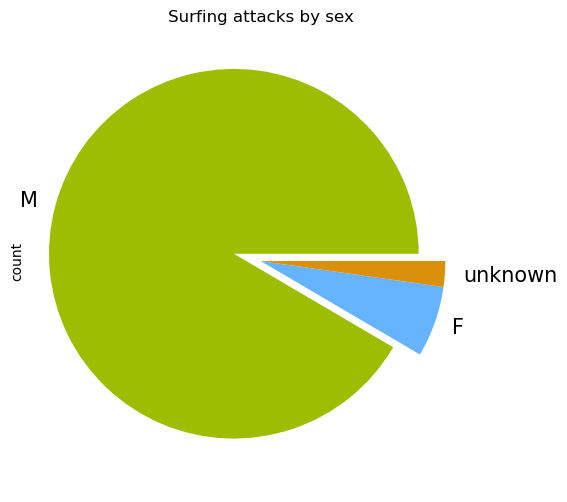

In [101]:
#Hacemos una gráfica con los ataques por sexo en surf

%matplotlib inline
surf_df.sex.value_counts().plot.pie(labels=['M', 'F', 'unknown'], fontsize=15, figsize=(6, 6), colors = ('#9dbd00','#66b3ff','#db900d','#ffcc99','#009dbd'), explode=(0.15, 0, 0), title = 'Surfing attacks by sex')

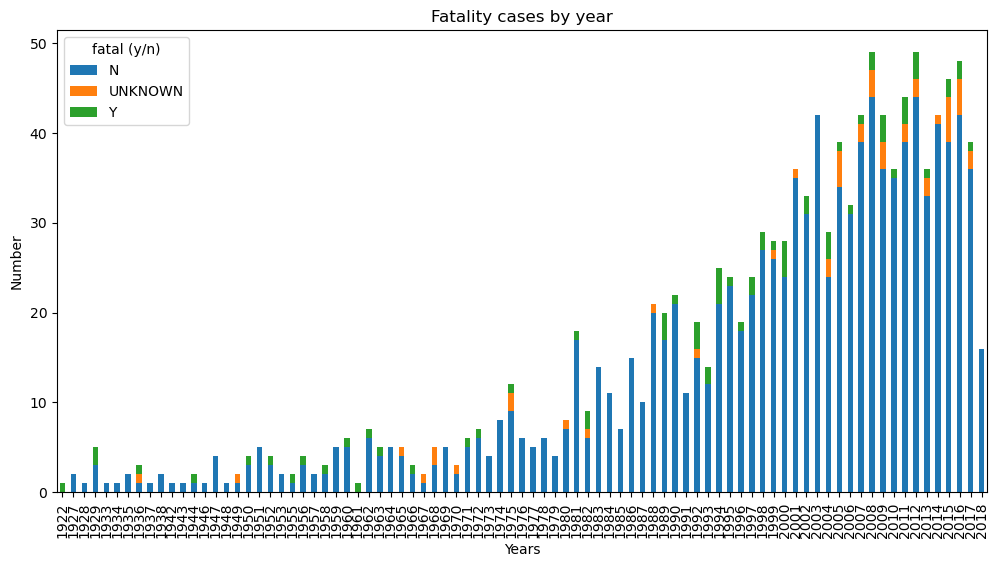

In [102]:
import matplotlib.pyplot as plt
data = df.groupby(['year', 'fatal (y/n)']).size().unstack()

# Creo un gráfico de barras
data.plot(kind='bar', stacked=True, figsize=(12, 6))

# Configur las etiquetas y el título
plt.xlabel('Years')
plt.ylabel('Number')
plt.title('Fatality cases by year')

# Muestra el gráfico
plt.show()

In [103]:
df.to_csv('../src/sharks_clean.csv', index=False) # guardamos en la carpeta src el archivo limpio.